# Imports and Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
df = pd.read_csv("Advertising.csv")

In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

# Linear Regression Section

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
linearModel = LinearRegression()

In [ ]:
linearModel.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictionsLinear = linearModel.predict(X_test)

In [ ]:
MAELinear = mean_absolute_error(y_test,predictionsLinear)
MSELinear = mean_squared_error(y_test,predictionsLinear)
RMSELinear = np.sqrt(MSELinear)

*Performance metrics for linear regression model*


In [ ]:
print(MAELinear)
print(MSELinear)
print(RMSELinear)
print(predictionsLinear)
linearModel.coef_

1.5116692224549086
3.79679723671522
1.9485372043446387
[16.5653963  21.18822792 21.55107058 10.88923816 22.20231988 13.35556872
 21.19692502  7.35028523 13.27547079 15.12449511  9.01443026  6.52542825
 14.30205991  8.97026042  9.45679576 12.00454351  8.91549403 16.15619251
 10.29582883 18.72473553 19.76821818 13.77469028 12.49638908 21.53501762
  7.60860741  5.6119801  20.91759483 11.80627665  9.08076637  8.51412012
 12.17604891  9.9691939  21.73008956 12.77770578 18.1011362  20.07590796
 14.26202556 20.93826535 10.83938827  4.38190607  9.51332406 12.40486324
 10.17045434  8.09081363 13.16388427  5.2243552   9.28893833 14.09330719
  8.69024497 11.66119763 15.71848432 11.63156862 13.35360735 11.1531472
  6.33636845  9.76157954  9.4195714  24.25516546  7.69519137 12.15317572]


array([0.04405928, 0.1992875 , 0.00688245])

In [ ]:
final_modelLinear = LinearRegression()
final_modelLinear.fit(X,y)
y_hat = final_modelLinear.predict(X)

In [ ]:
from joblib import dump, load

dump(final_modelLinear, 'sales_model.joblib')

loaded_modelLinear = load('sales_model.joblib')

In [ ]:
campaignLinear = [[149,22,12]]
loaded_modelLinear.predict(campaignLinear)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.893032])

# Polynomial Regression Section

*Finding best degree*

Best degree 3 with RMSE 0.5392350985674351


Text(0, 0.5, 'RMSE')

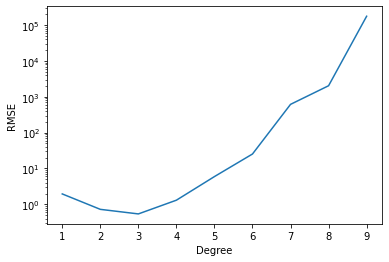

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#FINDING THE OPTIMAL DEGREE BY LOOPING

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#random_state=42 makes it so that we don't get different degrees each time

rmses = []
degrees = np.arange(1, 10) #array degrees with start 1 and end 10 step 1
min_rmse, min_deg = 1e10, 0 #looking for minimum RMSE to choose best degree

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse) #need to root the MSE value
    rmses.append(poly_rmse) #add the current RMSE value to RMSES array

    # Evaluating best degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse)) #.format(var that replaces first {}, var that replaces second {} )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

Same process as previous cell but calculating MAE instead

Best degree 3 with MAE 0.39728312133299737


Text(0, 0.5, 'MAE')

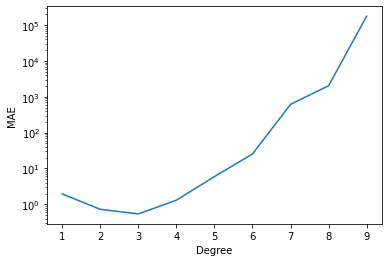

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

maes = []
degrees = np.arange(1, 10) #array degrees with start 1 and end 10 step 1
min_mae, min_deg = 1e10, 0 #looking for minimum MAE to choose best degree

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mae = mean_absolute_error(y_test,poly_predict)

    maes.append(poly_mae) #add the current MAE value to maes array

    # Cross-validation of degree
    if min_mae > poly_mae:
        min_mae = poly_mae
        min_deg = deg

# Plot and present results
print('Best degree {} with MAE {}'.format(min_deg, min_mae)) #.format(var that replaces first {}, var that replaces second {} )

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MAE')

Found the ideal degree:

Both the lowest RMSE and MAE values belong to degree 3, therefore it is the ideal polynomial degree.

Time to save

In [ ]:
#DEGREE 3 SEPERATELY

poly_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train2 = poly_features.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_poly_train2, y, test_size=0.3,random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(x_train, y_train)

x_poly_test = poly_features.fit_transform(x_test)
poly_predict = poly_reg.predict(x_test)

In [ ]:
optimal_polyreg_model = poly_reg
optimal_polyreg_model.fit(x_poly_train2,y)
y_hat = optimal_polyreg_model.predict(x_test)

In [ ]:
from joblib import dump, load

dump(poly_reg, 'optimal_polyreg_model.joblib')

loaded_modelPoly = load('optimal_polyreg_model.joblib')

In [ ]:
pred2array = np.array([[149,22,12]])
loaded_modelPoly.predict(poly_features.fit_transform(pred2array))

array([14.64501014])

# Ridge Regression Section

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridge_cv_model.fit(X,y)
ridge_test_predictions = ridge_cv_model.predict(X_test)
MAE_Ridge = mean_absolute_error(y_test,ridge_test_predictions)
MSE_Ridge = mean_squared_error(y_test,ridge_test_predictions)
RMSE_Ridge = np.sqrt(MSE_Ridge)

*Performance metrics for ridge regression model*

In [ ]:
print(MAE_Ridge)
print(MSE_Ridge)
print(RMSE_Ridge)
print(ridge_test_predictions)

1.4394502172242232
3.297763836291627
1.8159746243523411
[16.31491969 20.81929014 21.63393275 10.38419378 22.25547563 12.91968587
 21.10890184  7.39498431 13.74436506 15.16152361  9.01602764  6.55467859
 14.2237376   8.81330781  9.69138308 12.16205456  8.52771155 16.3599983
 10.17840973 18.97657476 19.4544138  12.82366023 12.26334886 21.22757221
  7.84904868  5.74216501 20.78135528 12.03700918  9.1273547   8.44914485
 12.55085774  9.951682   21.29260124 11.85831881 18.36721064 20.30110027
 14.00139958 20.85125263 11.06829582  4.47759859  9.67531007 12.78592478
  9.90867995  8.1465227  13.62646553  5.37035017  9.14402874 14.16607125
  8.76481175 11.59870361 15.30508486 11.97094469 12.47834043 10.5771689
  6.57078661  9.9029908   9.48964198 24.11860025  7.60769239 12.6357239 ]


In [ ]:
campaignRidge= [[149,22,12]]
ridge_cv_model.predict(campaignRidge)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  "X does not have valid feature names, but"


array([13.8930304])